In [2]:
# Cell 1: Import necessary libraries
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Callable, Tuple
import pandas as pd
import os, sys
# Get the notebook directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Add the project root to sys.path
sys.path.append(os.path.join(notebook_dir, ".."))

from utils.load_mc import *


In [3]:
decay_mode = "B2K0s2PipPimKmPipKp"
tuple_types = ["KSKmKpPip_DD", "KSKmKpPip_LL"]
years = ["2015", "2016", "2017", "2018"]  # Using all available years
data_dir = "/share/lazy/Mohamed/bu2kskpik/MC/processed/"  # Update if needed
tree_name = "DecayTree"

In [4]:
branches = [
    "B_ENDVERTEX_X", "B_ENDVERTEX_Y", "B_ENDVERTEX_Z", "B_ENDVERTEX_CHI2",
    "B_OWNPV_X", "B_OWNPV_Y", "B_OWNPV_Z", "B_IP_OWNPV", "B_IPCHI2_OWNPV",
    "B_FD_OWNPV", "B_FDCHI2_OWNPV", "B_DIRA_OWNPV", "B_P", "B_PT", "B_PE",
    "B_PX", "B_PY", "B_PZ", "B_MM", "B_MMERR", "B_M", "B_ID", "B_TAU",
    "B_TAUERR", "B_TAUCHI2", "KS_ENDVERTEX_X", "KS_ENDVERTEX_Y", "KS_ENDVERTEX_Z",
    "KS_ENDVERTEX_CHI2", "KS_OWNPV_X", "KS_OWNPV_Y", "KS_OWNPV_Z", "KS_IP_OWNPV",
    "KS_IPCHI2_OWNPV", "KS_FD_OWNPV", "KS_FDCHI2_OWNPV", "KS_DIRA_OWNPV", "KS_P",
    "KS_PT", "KS_PE", "KS_PX", "KS_PY", "KS_PZ", "KS_MM", "KS_MMERR", "KS_M",
    "KS_TAU", "KS_TAUERR", "KS_TAUCHI2", "KS_P0_P", "KS_P0_PT", "KS_P0_PE",
    "KS_P0_PX", "KS_P0_PY", "KS_P0_PZ", "KS_P0_M", "KS_P0_ID", "KS_P0_IP_OWNPV",
    "KS_P0_IPCHI2_OWNPV", "KS_P0_PIDK", "KS_P0_PIDp", "KS_P0_PIDe", "KS_P0_PIDmu",
    "KS_P0_ProbNNk", "KS_P0_ProbNNpi", "KS_P0_ProbNNp", "KS_P1_P", "KS_P1_PT",
    "KS_P1_PE", "KS_P1_PX", "KS_P1_PY", "KS_P1_PZ", "KS_P1_M", "KS_P1_ID",
    "KS_P1_IP_OWNPV", "KS_P1_IPCHI2_OWNPV", "KS_P1_PIDK", "KS_P1_PIDp", "KS_P1_PIDe",
    "KS_P1_PIDmu", "KS_P1_ProbNNk", "KS_P1_ProbNNpi", "KS_P1_ProbNNp", "P0_P",
    "P0_PT", "P0_PE", "P0_PX", "P0_PY", "P0_PZ", "P0_M", "P0_ID", "P0_IP_OWNPV",
    "P0_IPCHI2_OWNPV", "P0_PIDK", "P0_PIDp", "P0_PIDe", "P0_PIDmu", "P0_ProbNNk",
    "P0_ProbNNpi", "P0_ProbNNp", "P1_P", "P1_PT", "P1_PE", "P1_PX", "P1_PY",
    "P1_PZ", "P1_M", "P1_ID", "P1_IP_OWNPV", "P1_IPCHI2_OWNPV", "P1_PIDK",
    "P1_PIDp", "P1_PIDe", "P1_PIDmu", "P1_ProbNNk", "P1_ProbNNpi", "P1_ProbNNp",
    "P2_P", "P2_PT", "P2_PE", "P2_PX", "P2_PY", "P2_PZ", "P2_M", "P2_ID",
    "P2_IP_OWNPV", "P2_IPCHI2_OWNPV", "P2_PIDK", "P2_PIDp", "P2_PIDe", "P2_PIDmu",
    "P2_ProbNNk", "P2_ProbNNpi", "P2_ProbNNp", "eventNumber", "runNumber",
    "Polarity", "nCandidate"
]

In [5]:
data = load_mc(
    years=years,
    decay_modes=decay_mode,
    tuple_types=tuple_types,
    data_dir=data_dir,
    tree_name=tree_name,
    branches=branches,
    verbose=True
)


Loading Monte Carlo data:
  Years: ['2015', '2016', '2017', '2018']
  Decay modes: ['B2K0s2PipPimKmPipKp']
  Tuple types: ['KSKmKpPip_DD', 'KSKmKpPip_LL']
  Data directory: /share/lazy/Mohamed/bu2kskpik/MC/processed/
  Loading B2K0s2PipPimKmPipKp - KSKmKpPip_DD...
    Loaded 4507 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2015_B2K0s2PipPimKmPipKp.root
    Loaded 39286 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2016_B2K0s2PipPimKmPipKp.root
    Loaded 42733 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2017_B2K0s2PipPimKmPipKp.root
    Loaded 38204 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2018_B2K0s2PipPimKmPipKp.root
    Total events loaded for KSKmKpPip_DD: 124730
  Loading B2K0s2PipPimKmPipKp - KSKmKpPip_LL...
    Loaded 1299 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2015_B2K0s2PipPimKmPipKp.root
    Loaded 12299 events from /share/lazy/Mohamed/bu2kskpik/MC/processed/2016_B2K0s2PipPimKmPipKp.root
    Loaded 13260 events from

In [6]:
dd_data = data[decay_mode]["KSKmKpPip_DD"]
ll_data = data[decay_mode]["KSKmKpPip_LL"]
combined_data = ak.concatenate([dd_data, ll_data])

print(f"Loaded {len(dd_data)} events for DD tuple type")
print(f"Loaded {len(ll_data)} events for LL tuple type")
print(f"Combined data contains {len(combined_data)} events")

Loaded 124730 events for DD tuple type
Loaded 38239 events for LL tuple type
Combined data contains 162969 events


In [10]:

def calculate_selection_efficiency(data, cut_dict, name="Selection", verbose=True):
    """
    Apply a series of cuts to the data and calculate the selection efficiency.
    
    Args:
        data: Input data (awkward array)
        cut_dict: Dictionary of cuts to apply. Each key is a cut name, 
                 and each value is a tuple of (field, operator, value)
                 e.g., {'pt_cut': ('B_PT', '>', 2000)}
        name: Name for this selection
        verbose: Whether to print detailed information
    
    Returns:
        Dictionary with selection results and efficiencies
    """
    # Start with all events selected
    initial_count = len(data)
    if initial_count == 0:
        print("No events in input data!")
        return None
    
    # Initialize selection mask (all True)
    cumulative_mask = np.ones(initial_count, dtype=bool)
    cut_masks = {}  # Store individual cut masks
    cut_counts = {}  # Store the number of events passing each cut
    
    # Apply each cut sequentially and update the mask
    for cut_name, (field, operator, value) in cut_dict.items():
        # Skip if the field doesn't exist
        if field not in data.fields:
            print(f"Warning: Field '{field}' not found in data. Skipping {cut_name}.")
            continue
        
        # Apply the cut based on the operator
        if operator == '>':
            mask = data[field] > value
        elif operator == '<':
            mask = data[field] < value
        elif operator == '>=':
            mask = data[field] >= value
        elif operator == '<=':
            mask = data[field] <= value
        elif operator == '==':
            mask = data[field] == value
        elif operator == '!=':
            mask = data[field] != value
        else:
            print(f"Warning: Operator '{operator}' not supported. Skipping {cut_name}.")
            continue
        
        # Convert awkward mask to numpy boolean array
        mask_np = ak.to_numpy(mask)
        cut_masks[cut_name] = mask_np
        
        # Update cumulative mask
        cumulative_mask = cumulative_mask & mask_np
        
        # Count events passing this cut
        cut_counts[cut_name] = np.sum(cumulative_mask)
    
    # Calculate final count and efficiency
    final_count = np.sum(cumulative_mask)
    efficiency = final_count / initial_count if initial_count > 0 else 0
    
    # Calculate marginal efficiencies (each cut's individual impact)
    marginal_efficiencies = {}
    for cut_name in cut_dict.keys():
        if cut_name in cut_masks:
            marginal_eff = np.sum(cut_masks[cut_name]) / initial_count
            marginal_efficiencies[cut_name] = marginal_eff
    
    # Prepare results
    results = {
        'name': name,
        'initial_count': initial_count,
        'final_count': final_count,
        'efficiency': efficiency,
        'cut_counts': cut_counts,
        'marginal_efficiencies': marginal_efficiencies,
        'selection_mask': cumulative_mask
    }
    
    # Print results if verbose
    if verbose:
        print(f"\nSelection: {name}")
        print(f"Initial events: {initial_count}")
        print(f"Final events: {final_count}")
        print(f"Overall efficiency: {efficiency:.4f} ({efficiency*100:.2f}%)")
        print("\nCut flow:")
        
        # Create a dataframe for nicer display
        cuts_df = pd.DataFrame({
            'Cut': list(cut_dict.keys()),
            'Events Remaining': [cut_counts.get(cut, 0) for cut in cut_dict.keys()],
            'Cumulative Efficiency': [cut_counts.get(cut, 0)/initial_count for cut in cut_dict.keys()],
            'Individual Efficiency': [marginal_efficiencies.get(cut, 0) for cut in cut_dict.keys()]
        })
        
        # Format percentages
        cuts_df['Cumulative Efficiency'] = cuts_df['Cumulative Efficiency'].apply(lambda x: f"{x*100:.2f}%")
        cuts_df['Individual Efficiency'] = cuts_df['Individual Efficiency'].apply(lambda x: f"{x*100:.2f}%")
        
        print(cuts_df)
    
    return results


In [11]:

# Cell 6: Define some standard selection cuts
def get_standard_selection_cuts():
    """Define a set of standard selection cuts for B -> K0s K π K decays."""
    
    # Standard cuts for LHCb B decay analyses
    cuts = {
        # B meson cuts
        'B_PT_cut': ('B_PT', '>', 2000),                # B transverse momentum
        'B_DIRA_cut': ('B_DIRA_OWNPV', '>', 0.9999),    # Direction angle (pointing to PV)
        'B_IPCHI2_cut': ('B_IPCHI2_OWNPV', '<', 9),     # Impact parameter chi2 (small for particles from PV)
        'B_FDCHI2_cut': ('B_FDCHI2_OWNPV', '>', 50),    # Flight distance chi2 (significant displacement)
        'B_ENDVERTEX_CHI2_cut': ('B_ENDVERTEX_CHI2', '<', 10),  # Vertex quality
        
        # K0s cuts
        'KS_PT_cut': ('KS_PT', '>', 500),               # K0s transverse momentum
        'KS_FDCHI2_cut': ('KS_FDCHI2_OWNPV', '>', 100), # K0s flight distance chi2
        'KS_DIRA_cut': ('KS_DIRA_OWNPV', '>', 0.9995),  # K0s pointing to PV
        'KS_MM_cut': ('KS_MM', '>', 470) and ('KS_MM', '<', 530),  # K0s mass window
        
        # Pion from K0s cuts
        'KS_P0_PT_cut': ('KS_P0_PT', '>', 250),         # K0s pion PT
        'KS_P0_IPCHI2_cut': ('KS_P0_IPCHI2_OWNPV', '>', 9),  # K0s pion not from PV
        'KS_P1_PT_cut': ('KS_P1_PT', '>', 250),         # K0s pion PT
        'KS_P1_IPCHI2_cut': ('KS_P1_IPCHI2_OWNPV', '>', 9),  # K0s pion not from PV
        
        # Kaon cuts
        'P0_PT_cut': ('P0_PT', '>', 500),               # Kaon PT (assuming P0 is K-)
        'P0_IPCHI2_cut': ('P0_IPCHI2_OWNPV', '>', 25),  # Kaon IP chi2
        'P0_ProbNNk_cut': ('P0_ProbNNk', '>', 0.5),     # Kaon PID
        
        # Pion cuts
        'P1_PT_cut': ('P1_PT', '>', 500),               # Pion PT
        'P1_IPCHI2_cut': ('P1_IPCHI2_OWNPV', '>', 25),  # Pion IP chi2
        'P1_ProbNNpi_cut': ('P1_ProbNNpi', '>', 0.5),   # Pion PID
        
        # Kaon cuts
        'P2_PT_cut': ('P2_PT', '>', 500),               # Kaon PT (assuming P2 is K+)
        'P2_IPCHI2_cut': ('P2_IPCHI2_OWNPV', '>', 25),  # Kaon IP chi2
        'P2_ProbNNk_cut': ('P2_ProbNNk', '>', 0.5),     # Kaon PID
    }
    
    return cuts

# Cell 7: Define a function to create a tight selection
def get_tight_selection_cuts():
    """Define a set of tight selection cuts for B -> K0s K π K decays."""
    
    # Tighter cuts for better signal purity
    cuts = {
        # B meson cuts
        'B_PT_cut': ('B_PT', '>', 3000),                # Higher B transverse momentum
        'B_DIRA_cut': ('B_DIRA_OWNPV', '>', 0.99995),   # Tighter direction angle
        'B_IPCHI2_cut': ('B_IPCHI2_OWNPV', '<', 5),     # Tighter IP chi2
        'B_FDCHI2_cut': ('B_FDCHI2_OWNPV', '>', 100),   # Higher flight distance significance
        'B_ENDVERTEX_CHI2_cut': ('B_ENDVERTEX_CHI2', '<', 5),  # Better vertex quality
        
        # K0s cuts
        'KS_PT_cut': ('KS_PT', '>', 1000),              # Higher K0s transverse momentum
        'KS_FDCHI2_cut': ('KS_FDCHI2_OWNPV', '>', 200), # Higher K0s flight distance significance
        'KS_DIRA_cut': ('KS_DIRA_OWNPV', '>', 0.9998),  # Tighter K0s pointing
        'KS_MM_cut': ('KS_MM', '>', 480) and ('KS_MM', '<', 520),  # Tighter K0s mass window
        
        # Pion from K0s cuts
        'KS_P0_PT_cut': ('KS_P0_PT', '>', 400),         # Higher K0s pion PT
        'KS_P0_IPCHI2_cut': ('KS_P0_IPCHI2_OWNPV', '>', 16), # Higher K0s pion IP chi2
        'KS_P1_PT_cut': ('KS_P1_PT', '>', 400),         # Higher K0s pion PT
        'KS_P1_IPCHI2_cut': ('KS_P1_IPCHI2_OWNPV', '>', 16), # Higher K0s pion IP chi2
        
        # Kaon cuts
        'P0_PT_cut': ('P0_PT', '>', 800),               # Higher Kaon PT
        'P0_IPCHI2_cut': ('P0_IPCHI2_OWNPV', '>', 36),  # Higher Kaon IP chi2
        'P0_ProbNNk_cut': ('P0_ProbNNk', '>', 0.7),     # Tighter Kaon PID
        
        # Pion cuts
        'P1_PT_cut': ('P1_PT', '>', 800),               # Higher Pion PT
        'P1_IPCHI2_cut': ('P1_IPCHI2_OWNPV', '>', 36),  # Higher Pion IP chi2
        'P1_ProbNNpi_cut': ('P1_ProbNNpi', '>', 0.7),   # Tighter Pion PID
        
        # Kaon cuts
        'P2_PT_cut': ('P2_PT', '>', 800),               # Higher Kaon PT
        'P2_IPCHI2_cut': ('P2_IPCHI2_OWNPV', '>', 36),  # Higher Kaon IP chi2
        'P2_ProbNNk_cut': ('P2_ProbNNk', '>', 0.7),     # Tighter Kaon PID
    }
    
    return cuts

# Cell 8: Define a function to apply cuts progressively and visualize the results
def evaluate_cut_impact(data, cut_dict, field_to_plot='B_MM', range_to_plot=(5200, 5400), bins=100):
    """
    Apply cuts progressively and visualize their impact on a specified distribution.
    
    Args:
        data: Input data (awkward array)
        cut_dict: Dictionary of cuts to apply sequentially
        field_to_plot: Field to plot after each cut
        range_to_plot: Range for the histogram
        bins: Number of bins for the histogram
    
    Returns:
        Dictionary of results and a figure with the plots
    """
    # Start with all events
    initial_count = len(data)
    cumulative_mask = np.ones(initial_count, dtype=bool)
    cut_results = []
    
    # Create figure for plots
    n_cuts = len(cut_dict) + 1  # +1 for the initial distribution
    fig, axes = plt.subplots(n_cuts, 1, figsize=(10, 3*n_cuts), sharex=True)
    
    # Plot initial distribution
    ax = axes[0] if n_cuts > 1 else axes
    initial_values = ak.to_numpy(data[field_to_plot])
    ax.hist(initial_values, bins=bins, range=range_to_plot, histtype='step', linewidth=2)
    ax.set_title(f'Initial Distribution - {initial_count} events')
    ax.set_ylabel('Events')
    ax.grid(True, alpha=0.3)
    
    # Apply cuts sequentially and plot
    for i, (cut_name, (field, operator, value)) in enumerate(cut_dict.items()):
        # Skip if field doesn't exist
        if field not in data.fields:
            print(f"Warning: Field '{field}' not found in data. Skipping {cut_name}.")
            continue
            
        # Apply the cut
        if operator == '>':
            mask = data[field] > value
        elif operator == '<':
            mask = data[field] < value
        elif operator == '>=':
            mask = data[field] >= value
        elif operator == '<=':
            mask = data[field] <= value
        elif operator == '==':
            mask = data[field] == value
        elif operator == '!=':
            mask = data[field] != value
        else:
            print(f"Warning: Operator '{operator}' not supported. Skipping {cut_name}.")
            continue
        
        # Convert awkward mask to numpy and update cumulative mask
        mask_np = ak.to_numpy(mask)
        cumulative_mask = cumulative_mask & mask_np
        remaining_count = np.sum(cumulative_mask)
        eff = remaining_count / initial_count
        
        # Store results
        cut_results.append({
            'cut_name': cut_name,
            'field': field,
            'operator': operator,
            'value': value,
            'remaining_events': remaining_count,
            'efficiency': eff
        })
        
        # Plot distribution after this cut
        ax = axes[i+1] if n_cuts > 1 else axes
        values_after_cut = initial_values[cumulative_mask]
        ax.hist(values_after_cut, bins=bins, range=range_to_plot, histtype='step', linewidth=2)
        ax.set_title(f'After {cut_name} - {remaining_count} events ({eff*100:.2f}%)')
        ax.set_ylabel('Events')
        ax.grid(True, alpha=0.3)
    
    # Set common x-label
    fig.text(0.5, 0.04, field_to_plot, ha='center', fontsize=14)
    fig.tight_layout()
    
    # Return results and figure
    return {
        'cut_results': cut_results,
        'final_mask': cumulative_mask,
        'final_efficiency': cut_results[-1]['efficiency'] if cut_results else 1.0,
        'figure': fig
    }



In [12]:
# Cell 9: Apply standard selection to both DD and LL data
standard_cuts = get_standard_selection_cuts()
standard_selection_dd = calculate_selection_efficiency(dd_data, standard_cuts, name="Standard Selection (DD)")
standard_selection_ll = calculate_selection_efficiency(ll_data, standard_cuts, name="Standard Selection (LL)")
standard_selection_combined = calculate_selection_efficiency(combined_data, standard_cuts, name="Standard Selection (Combined)")

# Cell 10: Apply tight selection to both DD and LL data
tight_cuts = get_tight_selection_cuts()
tight_selection_dd = calculate_selection_efficiency(dd_data, tight_cuts, name="Tight Selection (DD)")
tight_selection_ll = calculate_selection_efficiency(ll_data, tight_cuts, name="Tight Selection (LL)")
tight_selection_combined = calculate_selection_efficiency(combined_data, tight_cuts, name="Tight Selection (Combined)")

def plot_selection_comparison(standard_selection, tight_selection, title="Selection Comparison"):
    """Plot comparison of standard and tight selections."""
    std_eff = standard_selection['efficiency']
    tight_eff = tight_selection['efficiency']
    
    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(['Standard Selection', 'Tight Selection'], [std_eff, tight_eff], 
            color=['blue', 'red'], alpha=0.7)
    
    # Add efficiency values as text
    plt.text(0, std_eff + 0.01, f"{std_eff*100:.2f}%", ha='center')
    plt.text(1, tight_eff + 0.01, f"{tight_eff*100:.2f}%", ha='center')
    
    plt.ylim(0, max(std_eff, tight_eff) * 1.2)
    plt.ylabel('Selection Efficiency')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    plt.savefig(f"{title.replace(' ', '_')}.pdf")
    
    return plt.gca()

# Plot selection comparison for DD, LL, and combined data
plot_selection_comparison(standard_selection_dd, tight_selection_dd, title="Selection Comparison (DD)")
plot_selection_comparison(standard_selection_ll, tight_selection_ll, title="Selection Comparison (LL)")
plot_selection_comparison(standard_selection_combined, tight_selection_combined, title="Selection Comparison (Combined)")




Selection: Standard Selection (DD)
Initial events: 124730
Final events: 6
Overall efficiency: 0.0000 (0.00%)

Cut flow:
                     Cut  Events Remaining Cumulative Efficiency  \
0               B_PT_cut            123606                99.10%   
1             B_DIRA_cut            123606                99.10%   
2           B_IPCHI2_cut            100751                80.78%   
3           B_FDCHI2_cut             99541                79.81%   
4   B_ENDVERTEX_CHI2_cut             83116                66.64%   
5              KS_PT_cut             80488                64.53%   
6          KS_FDCHI2_cut             71951                57.69%   
7            KS_DIRA_cut             71947                57.68%   
8              KS_MM_cut             71760                57.53%   
9           KS_P0_PT_cut             68646                55.04%   
10      KS_P0_IPCHI2_cut             67907                54.44%   
11          KS_P1_PT_cut             64923                52.05

/tmp/ipykernel_1594558/3216993840.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1594558/3216993840.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1594558/3216993840.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Axes: title={'center': 'Selection Comparison (Combined)'}, ylabel='Selection Efficiency'>

ValueError: Image size of 833x80474 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

ValueError: Image size of 846x147659 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

ValueError: Image size of 833x90072 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>


Selection: Custom Selection
Initial events: 162969
Final events: 5
Overall efficiency: 0.0000 (0.00%)

Cut flow:
                     Cut  Events Remaining Cumulative Efficiency  \
0               B_PT_cut            159492                97.87%   
1             B_DIRA_cut            159492                97.87%   
2           B_IPCHI2_cut            134497                82.53%   
3           B_FDCHI2_cut            133049                81.64%   
4   B_ENDVERTEX_CHI2_cut            111139                68.20%   
5              KS_PT_cut            108242                66.42%   
6          KS_FDCHI2_cut             99504                61.06%   
7            KS_DIRA_cut             98852                60.66%   
8              KS_MM_cut             98659                60.54%   
9           KS_P0_PT_cut             95612                58.67%   
10      KS_P0_IPCHI2_cut             94876                58.22%   
11          KS_P1_PT_cut             91944                56.42%   
12

<Axes: title={'center': 'B Mass Before and After Tight Selection'}, xlabel='B_MM [MeV/c²]', ylabel='Events'>

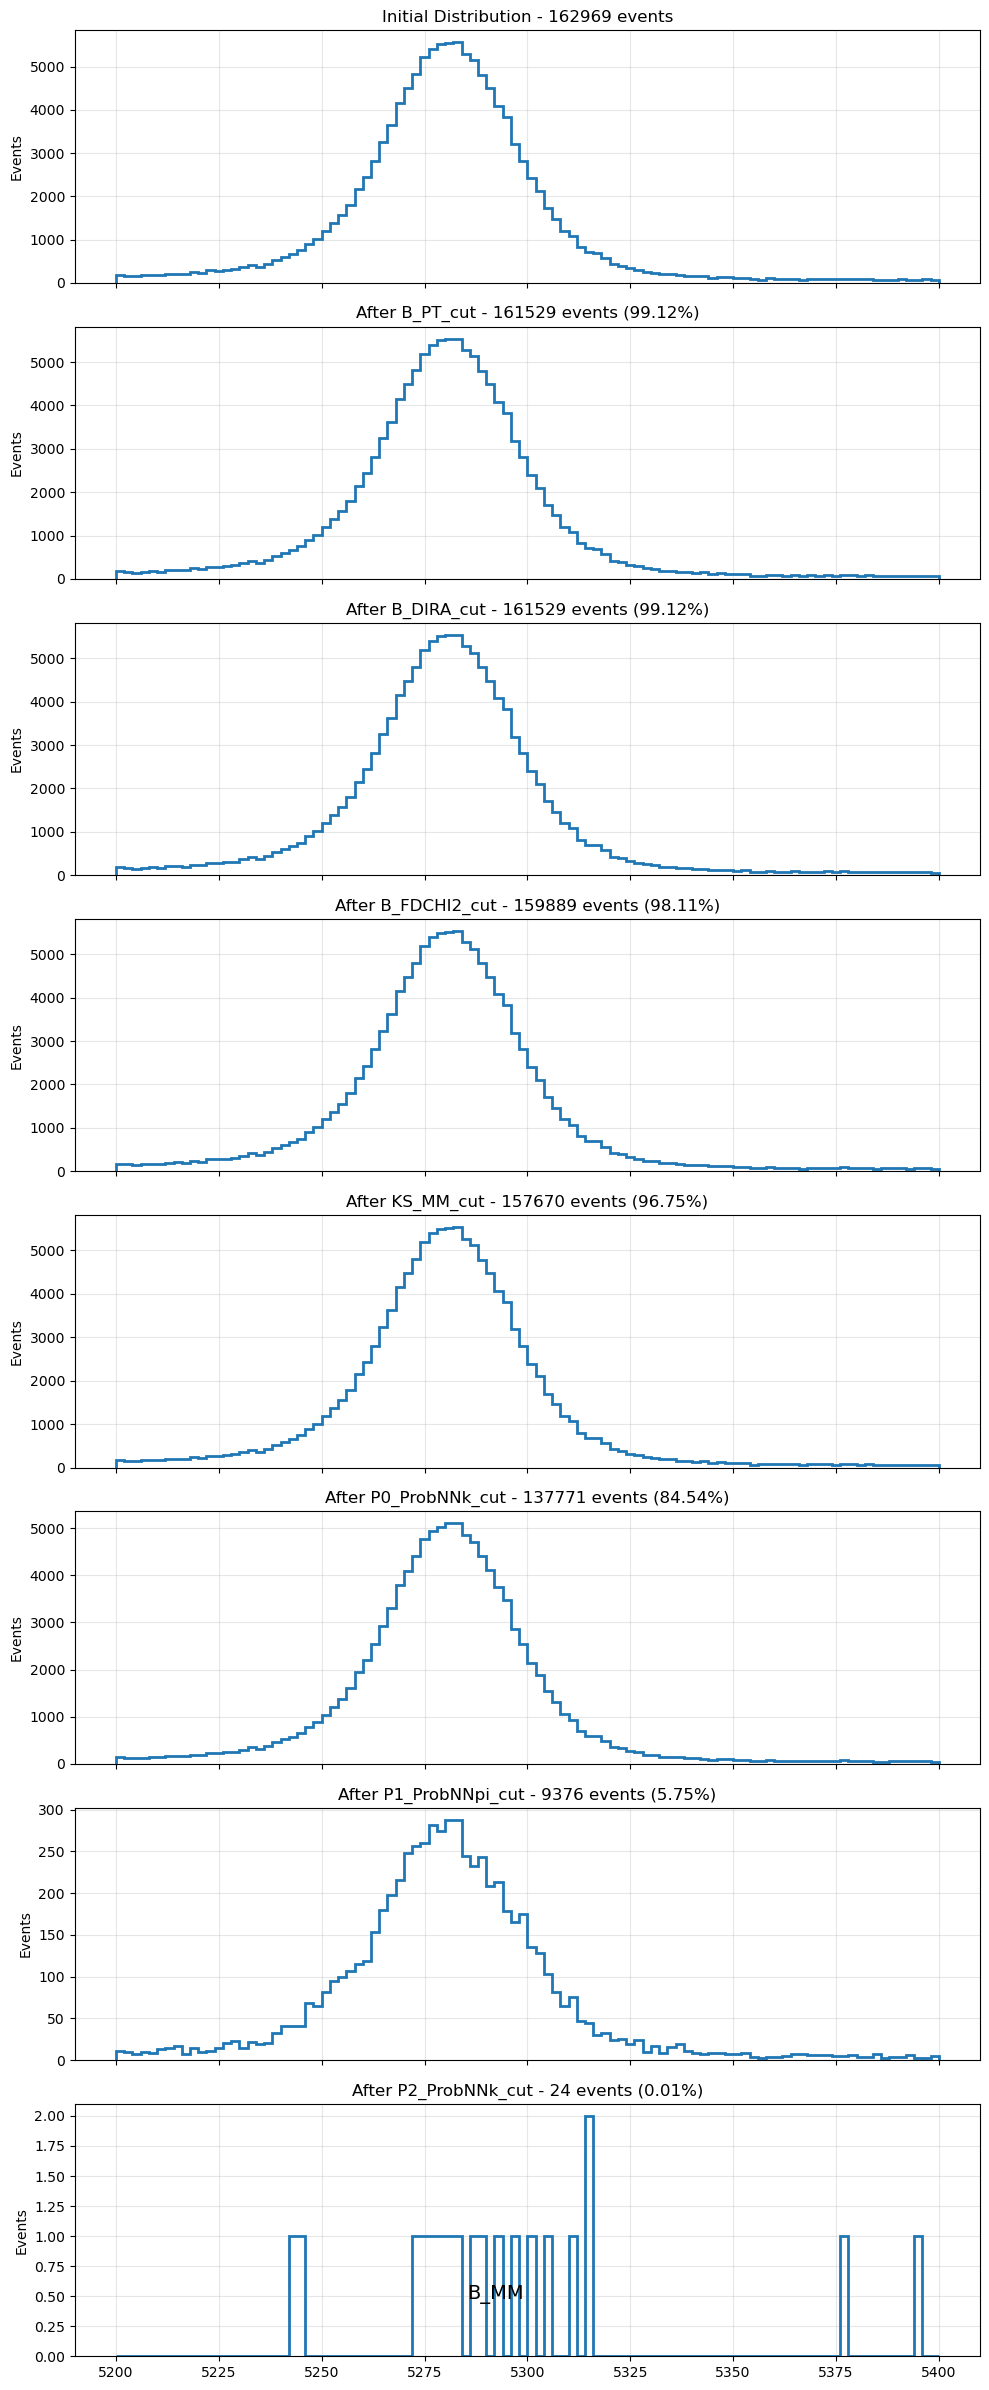

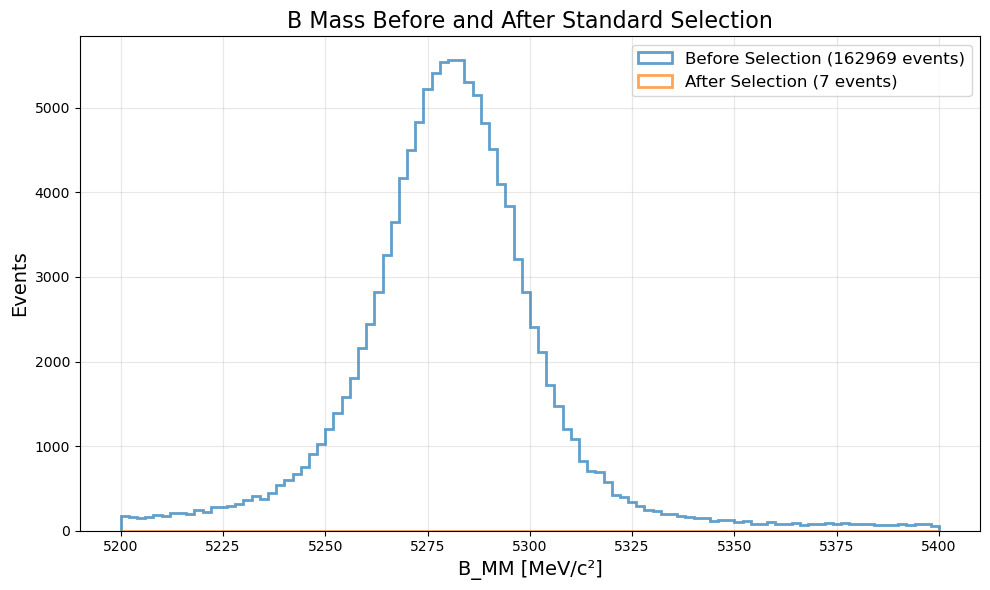

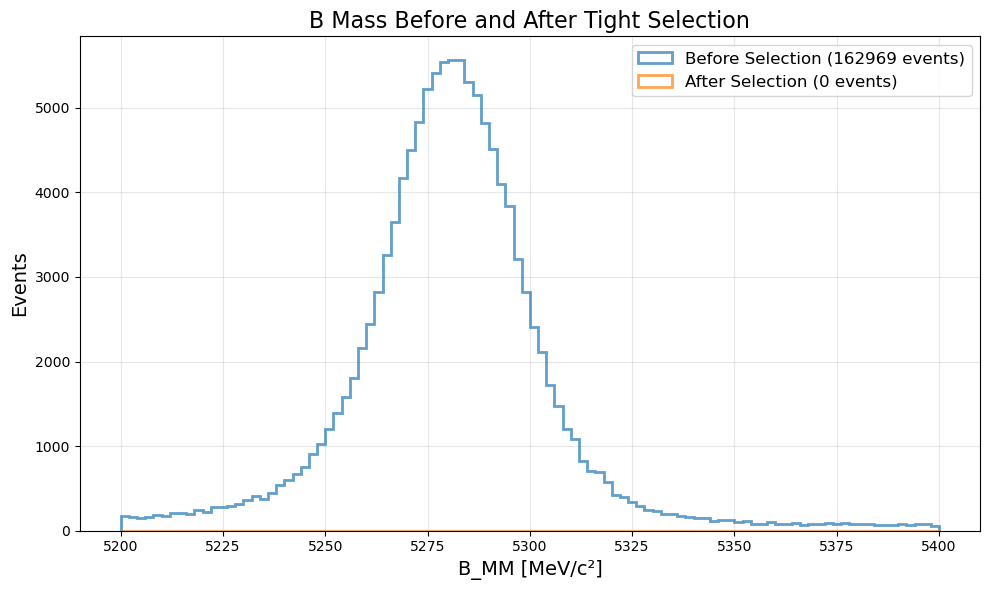

In [13]:
# Cell 12: Evaluate the impact of individual cuts on the B mass distribution
# Let's evaluate a subset of cuts to see their impact
key_cuts = {
    'B_PT_cut': standard_cuts['B_PT_cut'],
    'B_DIRA_cut': standard_cuts['B_DIRA_cut'],
    'B_FDCHI2_cut': standard_cuts['B_FDCHI2_cut'],
    'KS_MM_cut': standard_cuts['KS_MM_cut'],
    'P0_ProbNNk_cut': standard_cuts['P0_ProbNNk_cut'],
    'P1_ProbNNpi_cut': standard_cuts['P1_ProbNNpi_cut'],
    'P2_ProbNNk_cut': standard_cuts['P2_ProbNNk_cut']
}

# Evaluate impact on combined data
cut_impact = evaluate_cut_impact(combined_data, key_cuts, field_to_plot='B_MM')
cut_impact['figure'].savefig("Cut_Impact_on_B_Mass.pdf")

# Cell 13: Create a custom selection function that allows for combination of cuts
def create_custom_selection(selections=None, **kwargs):
    """
    Create a custom selection with specific cuts.
    
    Args:
        selections: List of predefined selections to include (e.g., ['standard', 'tight'])
        **kwargs: Custom cut parameters to override or add
                 Format: cut_name=(field, operator, value)
    
    Returns:
        Dictionary of cuts
    """
    cuts = {}
    
    # Add standard selections if requested
    if selections:
        if 'standard' in selections:
            cuts.update(get_standard_selection_cuts())
        if 'tight' in selections:
            cuts.update(get_tight_selection_cuts())
    
    # Update with custom cuts
    for cut_name, cut_params in kwargs.items():
        cuts[cut_name] = cut_params
    
    return cuts

# Example: Create a custom selection with some standard cuts and some custom ones
custom_cuts = create_custom_selection(
    selections=['standard'],  # Start with standard cuts
    # Override or add custom cuts
    B_PT_cut=('B_PT', '>', 2500),  # Custom B PT cut
    B_MM_window=('B_MM', '>', 5270) and ('B_MM', '<', 5290),  # Tight B mass window
    custom_KS_cut=('KS_PT', '>', 800)  # Custom KS PT cut
)

# Apply the custom selection
custom_selection = calculate_selection_efficiency(combined_data, custom_cuts, name="Custom Selection")

# Cell 14: Visualize the mass distribution before and after selection
def plot_mass_before_after(data, selection_mask, field='B_MM', bins=100, range=(5200, 5400), title="Mass Distribution"):
    """Plot the mass distribution before and after selection."""
    plt.figure(figsize=(10, 6))
    
    # Convert data to numpy array
    values = ak.to_numpy(data[field])
    
    # Plot before selection
    plt.hist(values, bins=bins, range=range, histtype='step', linewidth=2, 
             label=f'Before Selection ({len(values)} events)', alpha=0.7)
    
    # Plot after selection
    plt.hist(values[selection_mask], bins=bins, range=range, histtype='step', linewidth=2,
             label=f'After Selection ({np.sum(selection_mask)} events)', alpha=0.7)
    
    plt.xlabel(f'{field} [MeV/c²]', fontsize=14)
    plt.ylabel('Events', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    plt.savefig(f"{title.replace(' ', '_')}.pdf")
    
    return plt.gca()

# Plot mass before and after standard selection
plot_mass_before_after(combined_data, standard_selection_combined['selection_mask'], 
                      title="B Mass Before and After Standard Selection")

# Plot mass before and after tight selection
plot_mass_before_after(combined_data, tight_selection_combined['selection_mask'], 
                      title="B Mass Before and After Tight Selection")



TypeError: 'dict_keys' object is not subscriptable

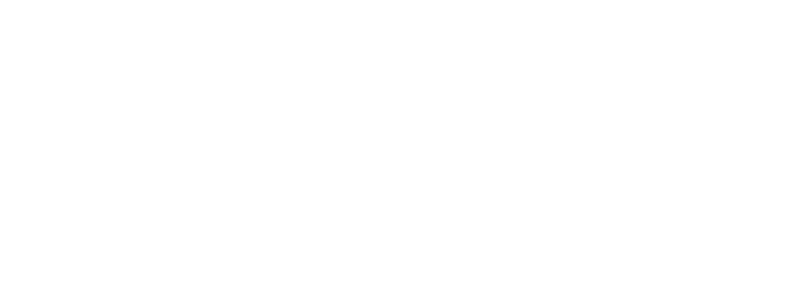

In [14]:
# Cell 15: Generate a comprehensive selection report
def generate_selection_report(data, selection_results, output_file="selection_report.pdf"):
    """Generate a comprehensive report on the selection efficiency."""
    from matplotlib.backends.backend_pdf import PdfPages
    
    with PdfPages(output_file) as pdf:
        # Page 1: Overview of selections
        plt.figure(figsize=(10, 8))
        
        # Create summary table
        selection_names = [result['name'] for result in selection_results]
        efficiencies = [result['efficiency']*100 for result in selection_results]
        initial_counts = [result['initial_count'] for result in selection_results]
        final_counts = [result['final_count'] for result in selection_results]
        
        table_data = {
            'Selection': selection_names,
            'Initial Events': initial_counts,
            'Final Events': final_counts,
            'Efficiency (%)': [f"{eff:.2f}%" for eff in efficiencies]
        }
        
        # Create a table plot
        ax = plt.subplot(2, 1, 1)
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=[[table_data[col][i] for col in table_data.keys()] 
                                     for i in range(len(selection_names))],
                          colLabels=table_data.keys(),
                          loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1, 1.5)
        
        # Plot efficiencies as a bar chart
        ax = plt.subplot(2, 1, 2)
        ax.bar(selection_names, [eff for eff in efficiencies], alpha=0.7)
        ax.set_ylim(0, max(efficiencies) * 1.2)
        ax.set_ylabel('Efficiency (%)')
        ax.set_title('Selection Efficiency Comparison')
        ax.grid(True, alpha=0.3)
        
        plt.suptitle('Selection Efficiency Summary', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        pdf.savefig()
        plt.close()
        
        # Page 2: Mass distributions before and after each selection
        for result in selection_results:
            plt.figure(figsize=(10, 6))
            
            values = ak.to_numpy(data['B_MM'])
            mask = result['selection_mask']
            
            plt.hist(values, bins=100, range=(5200, 5400), histtype='step', linewidth=2, 
                    label=f'Before Selection ({len(values)} events)', alpha=0.7)
            plt.hist(values[mask], bins=100, range=(5200, 5400), histtype='step', linewidth=2,
                    label=f'After Selection ({np.sum(mask)} events)', alpha=0.7)
            
            plt.xlabel('B_MM [MeV/c²]', fontsize=14)
            plt.ylabel('Events', fontsize=14)
            plt.title(f'B Mass Before and After {result["name"]}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            
            pdf.savefig()
            plt.close()
        
        # Page 3+: Detailed cut flow for each selection
        for result in selection_results:
            plt.figure(figsize=(10, 8))
            
            # Extract cut flow information
            cut_names = list(result['cut_counts'].keys())
            cut_values = list(result['cut_counts'].values())
            
            # Add initial count
            cut_names = ['Initial'] + cut_names
            cut_values = [result['initial_count']] + cut_values
            
            # Calculate efficiencies
            efficiencies = [count/result['initial_count']*100 for count in cut_values]
            
            # Plot cut flow
            ax = plt.subplot(2, 1, 1)
            ax.step(range(len(cut_names)), cut_values, 'o-', where='mid')
            ax.set_xticks(range(len(cut_names)))
            ax.set_xticklabels(cut_names, rotation=45, ha='right')
            ax.set_ylabel('Events Remaining')
            ax.set_title('Cut Flow')
            ax.grid(True, alpha=0.3)
            
            # Plot efficiencies
            ax = plt.subplot(2, 1, 2)
            ax.step(range(len(cut_names)), efficiencies, 'o-', where='mid')
            ax.set_xticks(range(len(cut_names)))
            ax.set_xticklabels(cut_names, rotation=45, ha='right')
            ax.set_ylabel('Cumulative Efficiency (%)')
            ax.set_title('Selection Efficiency')
            ax.grid(True, alpha=0.3)
            
            plt.suptitle(f'Cut Flow for {result["name"]}', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            
            pdf.savefig()
            plt.close()
    
    print(f"Selection report saved to {output_file}")
    return output_file

# Generate a comprehensive report for our selections
generate_selection_report(
    combined_data, 
    [standard_selection_combined, tight_selection_combined, custom_selection],
    output_file="B_selection_efficiency_report.pdf"
)

In [7]:
# Check PID variables to determine particle types
def analyze_particle_types(data):
    """Analyze PID variables to determine which particle is which"""
    print("\nAnalyzing particle types based on PID variables:")
    
    # Calculate average PID probabilities for each particle
    for i in range(3):
        k_prob = np.mean(ak.to_numpy(data[f'P{i}_ProbNNk']))
        pi_prob = np.mean(ak.to_numpy(data[f'P{i}_ProbNNpi']))
        p_prob = np.mean(ak.to_numpy(data[f'P{i}_ProbNNp']))
        ks_k_prob = np.mean(ak.to_numpy(data[f'KS_P{i}_ProbNNk']))
        ks_pi_prob = np.mean(ak.to_numpy(data[f'KS_P{i}_ProbNNpi']))
        ks_p_prob = np.mean(ak.to_numpy(data[f'KS_P{i}_ProbNNp']))
        print(f"\nParticle P{i}:")
        print(f"  Avg KS_P{i}_ProbNNk: {ks_k_prob:.4f}")
        print(f"  Avg KS_P{i}_ProbNNpi: {ks_pi_prob:.4f}")
        
        print(f"P{i}:")
        print(f"  Avg ProbNNk: {k_prob:.4f}")
        print(f"  Avg ProbNNpi: {pi_prob:.4f}")
        print(f"  Avg ProbNNp: {p_prob:.4f}")
        
        # Determine likely particle type
        if k_prob > pi_prob and k_prob > p_prob:
            print(f"  P{i} is likely a KAON")
        elif pi_prob > k_prob and pi_prob > p_prob:
            print(f"  P{i} is likely a PION")
        elif p_prob > k_prob and p_prob > pi_prob:
            print(f"  P{i} is likely a PROTON")
        else:
            print(f"  P{i} particle type is unclear")
        print()

# Run the analysis
analyze_particle_types(combined_data)


Analyzing particle types based on PID variables:

Particle P0:
  Avg KS_P0_ProbNNk: 0.0318
  Avg KS_P0_ProbNNpi: 0.8192
P0:
  Avg ProbNNk: 0.8450
  Avg ProbNNpi: 0.1242
  Avg ProbNNp: 0.2147
  P0 is likely a KAON


Particle P1:
  Avg KS_P1_ProbNNk: 0.0316
  Avg KS_P1_ProbNNpi: 0.8199
P1:
  Avg ProbNNk: 0.8418
  Avg ProbNNpi: 0.1262
  Avg ProbNNp: 0.2159
  P1 is likely a KAON



FieldNotFoundError: no field 'KS_P2_ProbNNk' in record with 138 fields

This error occurred while attempting to slice

    <Array [{B_ENDVERTEX_X: 1.01, ...}, ...] type='162969 * {B_ENDVERTEX_X:...'>

with

    'KS_P2_ProbNNk'